# Aula 6 - Análise de dados com _arrays_ multidimensionais
![image.png](https://somostera.com/wp-content/uploads/2017/08/Tera_logo_250.jpg)

### Show! Mas que diabos é um _array_ multidimensional?!
Por partes:
* _array_ é um vetor. Um vetor é uma lista!
* _array_ multidimensional é um _array_ de _arrays_ ou uma lista de listas.
![image.png](http://community.datacamp.com.s3.amazonaws.com/community/production/ckeditor_assets/pictures/332/content_arrays-axes.png)

### Tá, qual é a vantagem?
Um _array_ de duas dimensões é uma lista de listas.
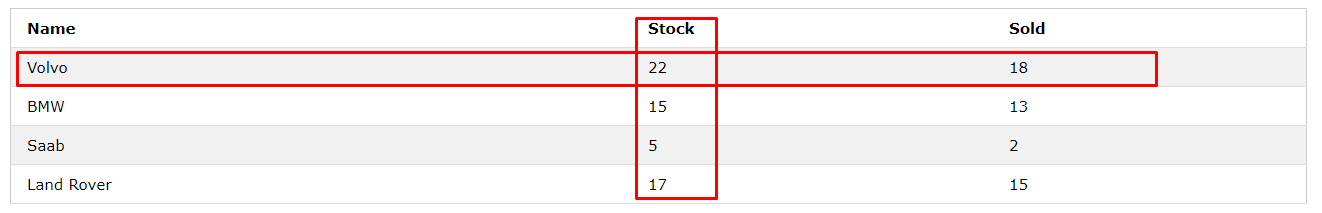

## NumPy e o mágico universo das matrizes e álgebra linear
NumPy vem de _Numerical Python_ e é uma biblioteca que permite a manipulação de dados em _arrays_.
* Agora podemos ter seqüências de valores n-dimensionais!
* Construção de matrizes e, por sua vez, usar álgebra linear (cenas dos próximos episódios, em _machine learning_).
    * Pandas <3
* Um mundo de facilidade na manipulação de dados!

Antes do NumPy, coisas muito simples ficavam consideravelmente complexas.
Vamos criar um vetor e multiplicar cada um dos elementos dele por 2 e depois somar 5 sem NumPy?

In [1]:
vector = [-3, 10, 0, -15, -6]

In [2]:
def transform(vec):
    transformed_vector = []
    for v in vec:
        transformed_vector.append(2*v +  5)
    return transformed_vector

In [3]:
transform(vector)

[-1, 25, 5, -25, -7]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import utils



In [2]:
def transform(vec):
    transformed_vector = []
    for v in vec:
        transformed_vector.append(2*v + 5)
    return transformed_vector

In [3]:
transform(vector)

[-1, 25, 5, -25, -7]

**E com NumPy?**

In [5]:
# más práticas de programação: vamos importar as bibliotecas agora
import numpy as np
import matplotlib.pyplot as plt
import utils

%matplotlib inline

In [6]:
vector_np = np.array(vector)

In [7]:
print(type(vector))
print(type(vector_np))

<class 'list'>
<class 'numpy.ndarray'>


In [8]:
(vector_np * 2) + 5

array([ -1,  25,   5, -25,  -7])

In [9]:
# ó como o Python entende um vetor do tipo lista
vector * 2

[-3, 10, 0, -15, -6, -3, 10, 0, -15, -6]

#### A vida é mais bonita e natural com NumPy <3

### Mãos na massa
Você é responsável pelo estoque de uma distribuidora e precisa calcular o preço total de uma compra. Como faz? (Nota: pensar em algoritmos é quebrar um grande problema em problemas menores.)
* Cada item tem um preço.
* Se mais de uma unidade de um item é comprada, o preço é multiplicado pela quantidade de itens.
* Total da compra é a soma da multiplicação.

In [10]:
n_items = np.array([101,   42,   18,   12,   5,  134])           # quantidade de itens comprados
prices  = np.array([12.2, 3.9, 15.0, 2.75, 1.1, 0.99])

In [11]:
def total_price(qt, prices):
    total = 0
    for i in range(len(qt)):
        total = qt[i] * prices[i]
    return total

In [12]:
total_price(n_items, prices)

132.66

In [10]:
# sem vantagens NumPy
cost = 0
for i in range(len(n_items)):
    cost += n_items[i] * prices[i]

cost

1837.1599999999999

In [12]:
# com vantagens NumPy
np.sum(n_items * prices)

1837.1599999999999

### Fun facts: NumPy não é melhor só pra gente
As máquinas gostam mais dele também.

Suponha que você tem vários armazéns de estoque da distribuidora e quer saber qual é o mais próximo de você no momento. Sua localização é dada por coordenadas (uma tupla de latitude e longitude), bem como a localização de cada estoque. Como faz?

In [13]:
your_location = np.array((2, 5))
warehouse_locations = np.array([(1 ,0), (2 ,4), (7 ,2), (0 ,5)])

In [14]:
def pure_python(your_loc, warehouse_locs):
    mx, my = your_loc

    best_wh = None
    min_d = 100
    dists = []
    for i, (x, y) in enumerate(warehouse_locs):
        d = abs(mx - x) + abs(my - y)
        if d < min_d:
            best_wh = i
            min_d = d

    return best_wh

In [15]:
pure_python(your_location, warehouse_locations)

1

In [16]:
np.abs((your_location - warehouse_locations)).sum(axis = 1).argmin()

1

In [17]:
warehouse_locations[1]

array([2, 4])

In [18]:
%timeit pure_python(your_location, warehouse_locations)

7.48 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [19]:
%timeit np.abs((your_location - warehouse_locations)).sum(axis = 1).argmin()

6.59 µs ± 368 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### Convencidos?
E a mágica não pára por aí...

Podemos definir _arrays_ NumPy passando listas, como já vimos:

In [20]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

Ou várias listas aninhadas:

In [21]:
b = np.array([[1, 2, 3], [3, 2, 1]])
b

array([[1, 2, 3],
       [3, 2, 1]])

E pode seguir e ficar tão complexo quanto eu bem entender!

In [22]:
np.array([[1, 2, 3], 
          [3, 2, 1],
          [0, 0, 0]])

array([[1, 2, 3],
       [3, 2, 1],
       [0, 0, 0]])

### Ferramentas legais
**Dimensões (_rank_) de um _array_:**
* Calendário: 2 dimensões
* Gasto com alimentação todo mês: 1 dimensão
* Jogo da velha ou batalha naval: 2 dimensões

In [23]:
a.ndim

1

In [24]:
b.ndim

2

**Formato (_shape_) do _array_:**
* Calendário: 5 x 7 (mas varia)
* Gasto com alimentação todo mês: 12
* Jogo da velha: 3 x 3
* Sudoku: 9 x 9

In [25]:
a.shape

(5,)

In [26]:
b.shape

(2, 3)

### Jogo rápido:
Quantas e quais são as dimensões desses _arrays_?

In [27]:
np.array([[ 0.4519243 ,  0.17657074,  0.82173731,  0.73718558],
          [ 0.37762179,  0.09939027,  0.84810815,  0.57109009]])

array([[0.4519243 , 0.17657074, 0.82173731, 0.73718558],
       [0.37762179, 0.09939027, 0.84810815, 0.57109009]])

In [28]:
np.array([9, 1, 8, 5, 0, 3])

array([9, 1, 8, 5, 0, 3])

In [29]:
np.array([[[ 0,  1,  2],
           [ 3,  4,  5],
           [ 6,  7,  8]],

          [[ 9, 10, 11],
           [12, 13, 14],
           [15, 16, 17]],

          [[18, 19, 20],
           [21, 22, 23],
           [24, 25, 26]]])

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

### _Array_ ou _list_?
Listas comportam objetos de diferentes tipos:

In [30]:
lst = [1, 1., 'one', int]

for item in lst:
    print(item, type(item))

1 <class 'int'>
1.0 <class 'float'>
one <class 'str'>
<class 'int'> <class 'type'>


_Arrays_, por outro lado, só podem ter objetos de um mesmo tipo (normalmente numéricos):

In [31]:
c = np.array([1.0, 2, 3, 4, 5, 'seis'])
c

array(['1.0', '2', '3', '4', '5', 'seis'], dtype='<U32')

In [32]:
c.dtype

dtype('<U32')

NumPy tenta inferir qual é o tipo que você quer e converte todos pro mesmo tipo (com preferência pelo mais flexível, claro).

Listas suportam qualquer dimensão:

In [33]:
matrix_py = [[1,2,3], ['one', 'two'], [1., 2., 3., 4., 5., 6.], ['one', 2, 3.0]]
matrix_py

[[1, 2, 3], ['one', 'two'], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0], ['one', 2, 3.0]]

_Arrays_ exigem que toda linha tenha a mesma dimensão pra conseguir montar a matriz.

In [34]:
matrix_np = np.array([[1,2,3], [10,20,30]])
print(matrix_np.shape)
print(matrix_np.dtype)
matrix_np

(2, 3)
int64


array([[ 1,  2,  3],
       [10, 20, 30]])

### Geradores
As magias NumPynianas incluem geradores de _arrays_ úteis:

In [48]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [49]:
np.zeros((2, 10), dtype = np.int64)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [50]:
np.random.random((6, 4))

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497, 0.18340451],
       [0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184]])

In [51]:
np.random.randint(1, 5, (3, 4))

array([[2, 2, 3, 2],
       [3, 4, 3, 4],
       [4, 1, 3, 1]])

In [52]:
?np.random

In [53]:
np.random.seed(42)

In [54]:
np.arange(10, 50, 5)      # Valores em sequência np.arange(primeiro inclusivo, último exclusivo, incremento)

array([10, 15, 20, 25, 30, 35, 40, 45])

### Indexação e atribuições
Para acessar o i-ésimo elemento de um _array_, basta fazer `a[i]`. Não se esqueça que todos os índices começam em zero!

In [55]:
a = np.array([0, 10, 20, 30, 40, 50])

In [56]:
a[4]

40

Da mesma forma, se temos duas dimensões e queremos acessar o elemento na linha `i` e coluna `j`, basta fazer `a[i, j]`.

In [57]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [58]:
a[0,2]

3

E ainda por cima posso usar a indexação para fazer atribuições!

In [59]:
z = np.zeros(10, dtype = int)
z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
z[4] = 1
z

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

### _Slicing_
É uma sintaxe que permite indexar intervalos e acessar sub-_arrays_ (fatias de _arrays_).

In [61]:
m = np.random.random((10,5))
m

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
       [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998],
       [0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
       [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203],
       [0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
       [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998],
       [0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446]])

Para acessar as três primeiras linhas e as duas últimas colunas, 

In [62]:
m[0:3]

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
       [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497]])

Você também pode ignorar um dos limites:

In [63]:
m[:, 4:5]

array([[0.15601864],
       [0.70807258],
       [0.18182497],
       [0.29122914],
       [0.45606998],
       [0.04645041],
       [0.96563203],
       [0.44015249],
       [0.25877998],
       [0.18485446]])

Ou usar índices negativos!

In [64]:
m[:3, -2:]

array([[0.59865848, 0.15601864],
       [0.60111501, 0.70807258],
       [0.21233911, 0.18182497]])

E combinar _slicing_ com índices:

In [65]:
m[0, :3]

array([0.37454012, 0.95071431, 0.73199394])

Note que isso reduz a dimensão do seu _array_:

In [66]:
print(m.ndim)
print(m[0].ndim)
print(m[:2, 0].ndim)
print(m[0,0].ndim)

2
1
1
0


In [67]:
print(m.shape)
print(m[0].shape)
print(m[:2, 0].shape)
print(m[0,0].shape)

(10, 5)
(5,)
(2,)
()


E atribuições com _slicing_? Pode também!

In [68]:
m = np.random.random((3,3))
m

array([[0.96958463, 0.77513282, 0.93949894],
       [0.89482735, 0.59789998, 0.92187424],
       [0.0884925 , 0.19598286, 0.04522729]])

In [69]:
m[1, ] = 0
m

array([[0.96958463, 0.77513282, 0.93949894],
       [0.        , 0.        , 0.        ],
       [0.0884925 , 0.19598286, 0.04522729]])

Se as dimensões batem, ainda podemos atribuir um _array_ num _slice_ de outro _array_:

In [70]:
m = np.zeros((4, 5))
m

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [71]:
m[1] = [1, 2, 3, 4, 5]
m[:, -1] = np.ones(4)

m

array([[0., 0., 0., 0., 1.],
       [1., 2., 3., 4., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

## Bora trabalhar?
Crie uma matriz com 5 colunas e 3 linhas de valores aleatórios entre 0 e 1. Depois, imprima o valor da segunda linha, terceira coluna.

In [72]:
matriz = np.random.random((3,5))

In [73]:
print(matriz)

[[0.32533033 0.38867729 0.27134903 0.82873751 0.35675333]
 [0.28093451 0.54269608 0.14092422 0.80219698 0.07455064]
 [0.98688694 0.77224477 0.19871568 0.00552212 0.81546143]]


In [75]:
matriz[0,-1]

0.3567533266935893

In [76]:
matriz[-1,]

array([0.98688694, 0.77224477, 0.19871568, 0.00552212, 0.81546143])

In [78]:
matriz[:,-1]

array([0.35675333, 0.07455064, 0.81546143])

In [79]:
matriz[1,2]

0.14092422497476265

In [80]:
matriz[0:2,:]

array([[0.32533033, 0.38867729, 0.27134903, 0.82873751, 0.35675333],
       [0.28093451, 0.54269608, 0.14092422, 0.80219698, 0.07455064]])

In [56]:
n = np.random.random((3, 5))
n

array([[ 0.05336318,  0.00730973,  0.74616021,  0.25604936,  0.76439243],
       [ 0.85597281,  0.96261062,  0.82658258,  0.51457562,  0.81615289],
       [ 0.79433335,  0.67545328,  0.1965312 ,  0.76277489,  0.79272695]])

In [57]:
n[1, 2]

0.82658257522977618

Crie um _array_ que vai de 2 a 10 (inclusivos) com incrementos de 0.5 em 0.5 (Dica: `np.arrange` e `np.linspace`).

In [85]:
pares = np.arange(2,10.1,0.5)

In [86]:
print(pares)

[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  9.   9.5 10. ]


In [89]:
pares = np.linspace(2,10,17)

In [90]:
print(pares)

[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  9.   9.5 10. ]


In [88]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [58]:
np.arange(2, 10.5, 0.5)

array([  2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,
         6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ])

In [59]:
np.linspace(2, 10, 17)

array([  2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,
         6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ])

In [94]:
ex3 = np.zeros((4,5))
ex3

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [97]:
ex3[:,2] = np.ones(4)
ex3

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [98]:
ex3[:,2] = np.ones(len(ex3))
ex3

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [60]:
a = np.zeros((4,5))
a[:, 2] = np.ones(len(a))
a

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.]])

Crie uma matriz 10 x 10 com valores aleatórios inteiros entre 0 e 9:

In [101]:
dez = np.random.randint(0,10,(10,10))
dez

array([[9, 5, 6, 3, 6, 7, 0, 5, 7, 4],
       [3, 1, 5, 5, 0, 8, 5, 2, 3, 3],
       [2, 9, 2, 2, 3, 6, 3, 8, 0, 7],
       [6, 1, 7, 0, 8, 8, 1, 6, 9, 2],
       [6, 9, 8, 3, 0, 1, 0, 4, 4, 6],
       [8, 8, 2, 2, 2, 3, 7, 5, 7, 0],
       [7, 3, 0, 7, 3, 5, 7, 3, 2, 8],
       [2, 8, 1, 1, 1, 5, 2, 8, 3, 0],
       [3, 0, 4, 3, 7, 7, 6, 2, 0, 0],
       [2, 5, 6, 5, 5, 5, 2, 5, 7, 1]])

In [104]:
a = np.random.randint(0, 9, (10,10))
a

array([[4, 0, 0, 4, 2, 3, 2, 0, 0, 4],
       [5, 2, 8, 4, 7, 0, 4, 2, 0, 3],
       [4, 6, 0, 2, 1, 8, 5, 2, 7, 7],
       [1, 5, 6, 1, 1, 0, 7, 0, 8, 5],
       [6, 6, 2, 1, 8, 7, 6, 8, 3, 3],
       [0, 7, 2, 6, 1, 1, 6, 5, 2, 8],
       [5, 5, 0, 3, 5, 5, 4, 0, 7, 4],
       [4, 6, 3, 5, 3, 2, 6, 7, 3, 1],
       [2, 0, 7, 2, 6, 4, 4, 6, 8, 4],
       [0, 0, 1, 5, 8, 7, 4, 0, 6, 4]])

Imprima os três primeiros elementos da última linha:

In [105]:
print(a[-1,0:3])

[0 0 1]


In [62]:
a[0,:3]

array([4, 2, 3])

Atribua esses elementos aos 3 primeiros da última linha:

In [63]:
a[-1,:3] = a[0,:3]
a

array([[4, 2, 3, 1, 7, 3, 4, 6, 5, 6],
       [1, 6, 6, 2, 1, 7, 8, 1, 2, 4],
       [2, 8, 4, 2, 2, 7, 3, 4, 0, 3],
       [3, 6, 4, 6, 4, 7, 7, 1, 7, 5],
       [6, 2, 3, 8, 1, 7, 7, 4, 0, 4],
       [5, 3, 8, 1, 5, 8, 3, 1, 2, 4],
       [3, 1, 0, 0, 3, 7, 0, 4, 8, 4],
       [0, 4, 7, 2, 0, 1, 5, 5, 8, 3],
       [3, 4, 7, 2, 2, 6, 6, 5, 0, 2],
       [4, 2, 3, 2, 4, 4, 0, 7, 2, 6]])

E se eu quiser esses mesmos 3 elementos nos três primeiros de todas as linhas?

In [64]:
a[:,:3] = a[0,:3]
a

array([[4, 2, 3, 1, 7, 3, 4, 6, 5, 6],
       [4, 2, 3, 2, 1, 7, 8, 1, 2, 4],
       [4, 2, 3, 2, 2, 7, 3, 4, 0, 3],
       [4, 2, 3, 6, 4, 7, 7, 1, 7, 5],
       [4, 2, 3, 8, 1, 7, 7, 4, 0, 4],
       [4, 2, 3, 1, 5, 8, 3, 1, 2, 4],
       [4, 2, 3, 0, 3, 7, 0, 4, 8, 4],
       [4, 2, 3, 2, 0, 1, 5, 5, 8, 3],
       [4, 2, 3, 2, 2, 6, 6, 5, 0, 2],
       [4, 2, 3, 2, 4, 4, 0, 7, 2, 6]])

### Acesso com máscaras booleanas

In [106]:
a = np.arange(20).reshape(5,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

Podemos acessar um _array_ com um _array_ de booleanos com o mesmo _shape_.

In [107]:
a[[True, False, True, True, False]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [108]:
a[:, [True, False, True, False]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

Parece estranho, eu sei... mas é bastante útil e fará sentido em breve!

#### Lembrete rápido sobre _slicing_
* Se você ignorar um dos limites, ele considera todo o restante
* O limite inferior é inclusivo, já o limite superior é exclusivo
* Você pode usar índices negativos
* Diferente da indexação direta, índices inválidos vão retornar um _array_ vazio, e não um erro
* _Slincing_ e acessos diretos podem ser combinados, porém lembre-se que seu _array_ perde dimensões com cada acesso

### Operações matemáticas com _arrays_
Já vimos como o NumPy facilita a vida ao lidar com operações matemáticas em _arrays_ de forma natural. NumPy suporta todas as operações tradicionais e mais muitas outras!

A maioria das operações que fazemos é elemento por elemento (_element-wise_), ou seja, se C = A + B, temos que `A.shape == B.shape == C.shape` e para todo i, j temos que `C[i,j] = A[i,j] + B[i,j]`

In [109]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
z = np.ones((2,2))

In [110]:
x

array([[1., 2.],
       [3., 4.]])

In [111]:
y

array([[5., 6.],
       [7., 8.]])

In [112]:
z

array([[1., 1.],
       [1., 1.]])

In [113]:
x + y

array([[ 6.,  8.],
       [10., 12.]])

In [114]:
(x + y)*z

array([[ 6.,  8.],
       [10., 12.]])

Há também outras formas de se operar _arrays_:

In [115]:
np.add(x, y)

array([[ 6.,  8.],
       [10., 12.]])

In [116]:
np.subtract(x, y)

array([[-4., -4.],
       [-4., -4.]])

In [117]:
np.multiply(x, y)

array([[ 5., 12.],
       [21., 32.]])

In [118]:
np.divide(x, y)

array([[0.2       , 0.33333333],
       [0.42857143, 0.5       ]])

Também podemos fazer operações entre um escalar e um _array_, aí o escalar é aplicado a todos os elementos do _array_.

In [119]:
(2*x + y/2)*z

array([[ 4.5,  7. ],
       [ 9.5, 12. ]])

NumPy também tem várias funções de comparação:

In [120]:
a = np.array([-3, 7, 3, 23])
b = np.array([0, 2, 10, -1])
c = np.array([1, 13, 0, 8])

np.maximum(a, b)
np.minimum(a, b)

array([-3,  2,  3, -1])

### Operações lógicas
Operações lógicas são bastante comuns em _arrays_ também:

In [121]:
a > b

array([False,  True, False,  True])

In [122]:
(b > a) & (b < c)

array([ True, False, False, False])

In [123]:
(b > a) & (b > c)

array([False, False,  True, False])

São úteis para contar valores que tornam alguma condição verdade (isso porque o NumPy considera `True = 1` e `False = 0`)

In [124]:
np.sum(a < b)

2

Também são incrivelmente úteis para indexação e atribuição:

In [125]:
a[a > 5]

array([ 7, 23])

### Exercícios!
Dado o array abaixo, o que é retornado por `a[[True, False, False, False, True]]`? (pense antes de rodar)

In [126]:
a = np.arange(20).reshape(5,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [127]:
a[[True, False, False, False, True]]

array([[ 0,  1,  2,  3],
       [16, 17, 18, 19]])

Quantos elementos estão entre 40 e 60?

In [133]:
a = np.array([[17, 18, 34, 78, 65],
              [26, 92, 48, 56,  6],
              [19, 41, 97, 52, 43],
              [62, 49, 74, 97,  5],
              [65, 93,  3, 15, 22]])

In [134]:
np.sum((a > 40) & (a < 60))

6

In [87]:
np.sum((a > 40) & (a < 60))

6

Divida o array a em b e c, onde b tem as linhas que começam com valores menores que 5 e b as linhas que começam com valores maiores ou iguais a 5:

In [135]:
a = np.random.randint(1, 10, 90).reshape(15,6)
a

array([[6, 7, 3, 3, 5, 6],
       [9, 5, 1, 4, 5, 5],
       [7, 4, 1, 5, 7, 6],
       [5, 4, 2, 4, 3, 1],
       [8, 5, 4, 8, 7, 2],
       [1, 4, 8, 2, 3, 1],
       [1, 3, 5, 3, 1, 1],
       [8, 2, 3, 2, 3, 7],
       [1, 8, 2, 3, 9, 7],
       [4, 5, 2, 8, 4, 9],
       [5, 9, 4, 5, 9, 8],
       [3, 1, 3, 4, 2, 1],
       [7, 8, 7, 5, 1, 7],
       [7, 9, 3, 9, 1, 1],
       [4, 9, 6, 3, 1, 4]])

In [138]:
b = a[a[:, 0] < 5]
c = a[a[:, 0] >= 5]

Crie uma matriz 5 x 5 com números inteiros entre 0 e 9. Agora retorne a primeira linha somada com a última, subtraída pelo número exatamente no centro da matriz:

In [139]:
x = np.random.randint(0,9,(5,5))
x

array([[8, 2, 8, 6, 3],
       [2, 4, 4, 2, 8],
       [3, 4, 3, 4, 6],
       [8, 6, 4, 6, 4],
       [2, 6, 1, 8, 0]])

In [140]:
x[0] + x[:, -1] + x[2, 2]

array([14, 13, 17, 13,  6])

### _Views_ vs _Copy_
NumPy evita fazer cópias desnecessárias dos dados. Apesar disso ser super eficiente, também facilita para cometermos erros:

In [92]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [93]:
v = a[:,1:3]
v

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

`v` é uma _view_ de `a` (um pedaço), mas não uma cópia.

In [94]:
v[:] = 100
v

array([[100, 100],
       [100, 100],
       [100, 100]])

Para resolver isso, você pode usar o método `copy` (mas só se precisar mesmo):

In [95]:
a = np.arange(12).reshape(3,4)

c = a[:,1:3].copy()
c

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

Agora `c` é uma cópia de `a`.

In [96]:
c[:] = 100
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## Usando imagens para explorar _arrays_

In [141]:
from matplotlib.image import imread
from matplotlib.pyplot import imshow

def imshowg(img):
    imshow(img, cmap = 'gray')

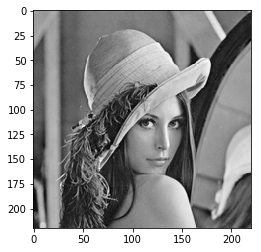

In [142]:
img = imread('lenna-gray.png')
imshowg(img)

Investigando um pouco mais o que é uma imagem, vemos que é apenas um array de duas dimensões:

In [143]:
print(img.shape)
print(img.dtype)

(220, 220)
float32


Assim sendo, podemos manipular os valores da imagem da forma que bem entendermos!

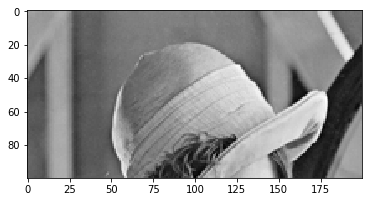

In [144]:
imshowg(img[:100, :200])

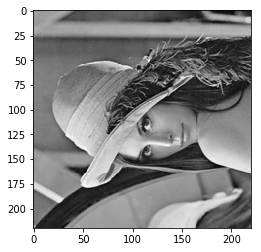

In [145]:
imshowg(img.T)

### Exercícios com imagens
_Because we can._ 

Faça um close dramático nos olhos da Lenna!

In [146]:
print(img[100:125, 100:170])

[[0.22352941 0.5686275  0.54901963 ... 0.2627451  0.28627452 0.27058825]
 [0.5019608  0.58431375 0.4509804  ... 0.2784314  0.28235295 0.24705882]
 [0.5764706  0.4509804  0.5686275  ... 0.2901961  0.28235295 0.24705882]
 ...
 [0.52156866 0.5529412  0.5686275  ... 0.24705882 0.23137255 0.20784314]
 [0.5176471  0.5568628  0.57254905 ... 0.24705882 0.22352941 0.20784314]
 [0.5254902  0.54509807 0.57254905 ... 0.24705882 0.21960784 0.22745098]]


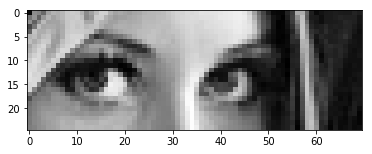

In [149]:
imshowg(img[100:125, 100:170])

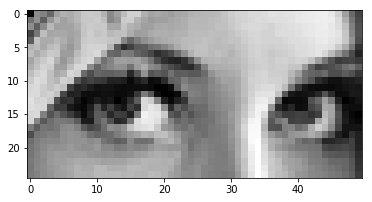

In [102]:
imshowg(img[100:125, 100:150])

Lenna não quer ser identificada. Vamos esconder seus belos olhos com uma tarja preta.

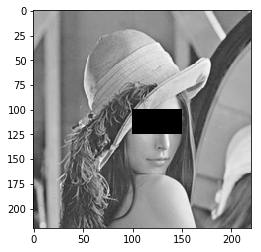

In [151]:
i = img.copy()
i[100:125, 100:150] = 0
imshowg(i)

Lenna quer ser uma estrela de cinema. Faça sua imagem parecer um tela _widescreen_ (tarjas pretas inferiores e superiores).

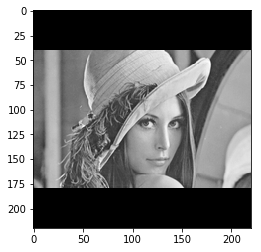

In [153]:
i = img.copy()
i[:40, :] = 0
i[-40:, :] = 0

imshowg(i)

## Funções
NumPy oferece várias funções matemáticas clássicas e todas estão prontas para operar em _arrays_, elemento a elemento:

In [105]:
a = np.array([2, 4, 1, 16])
a

array([ 2,  4,  1, 16])

In [106]:
np.log2(a)

array([ 1.,  2.,  0.,  4.])

In [107]:
np.sqrt(a)

array([ 1.41421356,  2.        ,  1.        ,  4.        ])

In [108]:
np.power(a, 2)

array([  4,  16,   1, 256], dtype=int32)

In [109]:
a**2

array([  4,  16,   1, 256])

## Gráficos!
Vamos aprender o básico do básico de Matplotlib para podermos visualizar algumas das nossas análises. O principal método da biblioteca é o `plt.plot(x, y)`.

In [154]:
import matplotlib.pyplot as plt

Se quisermos plotar os pontos (1, 1), (2, 2) e (3, 3) com diferentes tipos de plot:

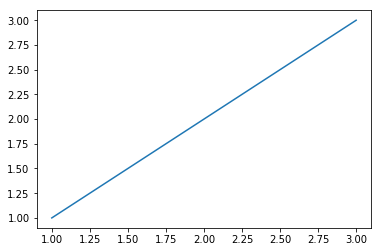

In [155]:
plt.plot([1,2,3], [1,2,3])

É bem simples, como vimos, só lembre-se que cada eixo fica em um _array_ separado, ao invés de passarmos os pontos juntos:

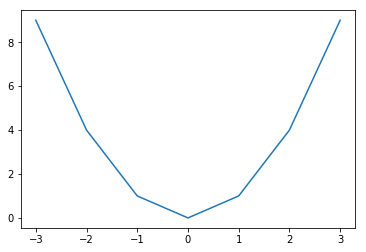

In [112]:
x = np.array([-3,-2,-1,-0,1,2,3])
plt.plot(x, x**2)

Nosso plot parece meio quadradão :/

Podemos combinar os geradores de _arrays_ com as funções NumPy para plotar mais pontos e visualizar diferentes funções:

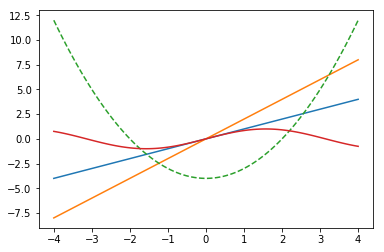

In [113]:
x = np.linspace(-4, 4, 100)
plt.plot(x, x)
plt.plot(x, 2*x)
plt.plot(x, x**2 - 4, '--')
plt.plot(x, np.sin(x))

Matplolib é extremamente customizável, mas teremos tempo pra explorar suas funcionalidades em outra aula.

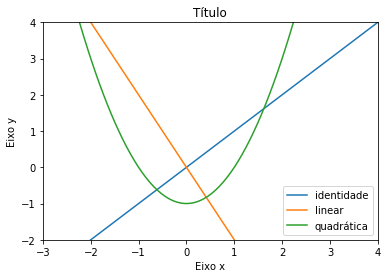

In [114]:
x = np.linspace(-4, 4, 100)
plt.plot(x, x, label = 'identidade')
plt.plot(x, -2*x, label = 'linear')
plt.plot(x, x**2 - 1, label = 'quadrática')
plt.title('Título')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.xlim((-3, 4))
plt.ylim((-2, 4))
plt.legend()

## Exercícios
Calcule a distância absoluta entre cada elemento de A para cada elemento de B:

In [115]:
a = np.array([[ 2.24076221,  6.94465659,  8.1025218 ],
              [ 2.5315115 ,  5.11973604,  4.47462266]])
b = np.array([[ 0.05494317,  5.85191288,  1.74149864],
              [ 9.24855539,  7.85211148,  8.7456627 ]])

In [116]:
np.abs(a - b).astype(int)

array([[2, 1, 6],
       [6, 2, 4]])

Existe um resultado interessante da trigonometria diz que, para qualquer valor x, temos que $\sin(x)^2 + \cos(x)^2 = 1$. Verifique se isso é verdade para pelo menos 30 valores aleatórios.

In [117]:
a = np.random.random(30)
np.allclose(np.sin(a)**2 + np.cos(a)**2, 1)

True

## Agregações
NumPy oferece funções que agregam múltiplos valores em um único valor, como `sum` e `mean`:

In [118]:
a = np.arange(10)

print(' sum:', a.sum())
print(' min:', a.min())
print(' max:', a.max())
print(' cum:', a.cumsum())
print('mean:', a.mean())
print(' std: ', a.std())

 sum: 45
 min: 0
 max: 9
 cum: [ 0  1  3  6 10 15 21 28 36 45]
mean: 4.5
 std:  2.87228132327


Notem como é possível chamar tanto `np.func(a)`, ou `a.func()`.

Quando temos mais de uma dimensão podemos fazer agregações em dimensões específicas usando o argumento `axis`:

In [119]:
m = np.arange(12).reshape(3,4)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [120]:
np.sum(m, axis=0)

array([12, 15, 18, 21])

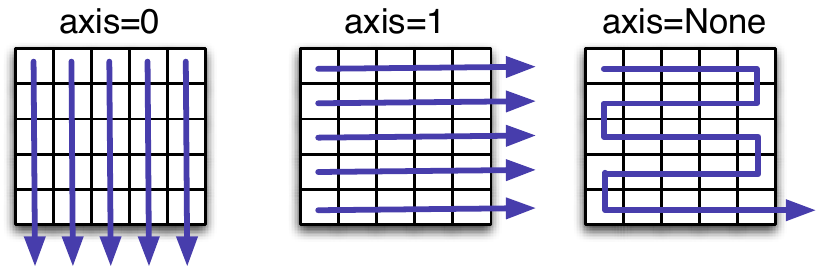


Muitos métodos oferecem um opção `arg`, que ao invés de retornar o valor, retorna o índice:

In [121]:
a = np.array([4, 8, 8, 2, 5, 6, 0])
np.where(np.max(a) == a)

(array([1, 2], dtype=int64),)

Esses métodos são importantes pois muitas vezes queremos saber qual é o maior elemento, e não o valor do maior elemento.

## Exercícios
### Métricas de erro
É muito comum termos métricas de erro no processo de modelagem. Uma métrica geralmente vai falar quão distante nossas predições estão dos dados reais. Por exemplo, se eu estava tentando prever vendas em 3 setores da minha empresa no próximo mês, após eu ter observado que as vendas reais foram [97K, 50K, 12K], um resultado que previu [102K, 74K,  5K] é claramente melhor que um que previu [20K, 400K, 15K]. Porém a medida que esses números se aproximam, devemos ter formas mais quantitativas de avaliar essas previsões.

Uma métrica de erro popular é a raiz do erro quadrático médio (RMSE). Se os valores que você queria prever estão no array $Y$, e os valores de fato preditos estão no array $Y^p$, o RMSE das suas predições é definido como $\sqrt{\frac{1}{n} \sum_{i=1}^{n}{{(Y_i - Y^p_i)}^2}}$

Dados Y e Yp, calcule o RMSE:

In [122]:
Y = np.array([1.67, 1.78, 1.57, 1.50, 2.01])
Yp = np.array([1.51, 1.72, 1.81, 1.41, 1.91])

In [123]:
np.sqrt(((Y - Yp)**2).mean())

0.14484474446799922

## Outliers
Um outlier é um valor anormalmente maior ou menor que os outros valores de uma mesma variável (_array_). Eles costumam atrapalhar análises e métodos estatísticos por serem uma anomalia. Vamos definirmos um outlier como qualquer valor da variável X que esteja distante da média de X por mais de 3 vezes o desvio padrão de X. Liste os outliers da variável abaixo:

In [124]:
a = np.array([-16.6, -145.72, 66.36, -197.01, -118.13, 133.02, 117.31, 83.64, 103.38, 
              61.06, 129.33, -85.02, -202.67, 86.2, -66.51, -40.59, 39.86, 24.75, 15.58, 
              3023.3, 59.52, -89.94, 61.73, -55.74, -31.21, -150.92, 122.08, 44.03, 6.66, 
              129.76, -105.09, 113.48, -178.97, -71.71, -66.32, 55.31, 41.04, 107.6, 81.87, 
              2430.6, -140.71, -98.84, 52.57, 3.2, 22.77, -81.76, -49.85, 162.47, 167.89, 75.32])

In [125]:
outliers_mask = np.abs(a-a.mean()) > 3*a.std()
a[outliers_mask]

array([ 3023.3,  2430.6])

## Voltemos à Lenna, agora com cores!
Como você acha que a representação deveria ser para podermos ter cor?

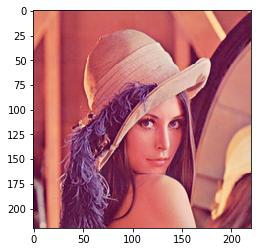

In [156]:
img = imread('lenna.png')
imshow(img)

In [160]:
img.shape

(220, 220, 3)

In [161]:
img

array([[[0.88235295, 0.5372549 , 0.49803922],
        [0.8784314 , 0.53333336, 0.49803922],
        [0.8901961 , 0.5254902 , 0.46666667],
        ...,
        [0.8901961 , 0.5529412 , 0.5019608 ],
        [0.9098039 , 0.58431375, 0.4862745 ],
        [0.8352941 , 0.47058824, 0.40784314]],

       [[0.88235295, 0.5372549 , 0.49803922],
        [0.8784314 , 0.53333336, 0.49803922],
        [0.8901961 , 0.5254902 , 0.46666667],
        ...,
        [0.9019608 , 0.5647059 , 0.50980395],
        [0.93333334, 0.60784316, 0.49803922],
        [0.85882354, 0.4862745 , 0.4117647 ]],

       [[0.8901961 , 0.5372549 , 0.47843137],
        [0.88235295, 0.5254902 , 0.4627451 ],
        [0.89411765, 0.52156866, 0.45882353],
        ...,
        [0.81960785, 0.44313726, 0.41568628],
        [0.7411765 , 0.38039216, 0.3764706 ],
        [0.58431375, 0.23921569, 0.3137255 ]],

       ...,

       [[0.35686275, 0.10980392, 0.23529412],
        [0.37254903, 0.11372549, 0.23921569],
        [0.38039216, 0

### Exercícios
Como seria essa imagem sem nenhum tom verde? Coloque 0 no canal verde e plote a imagem:

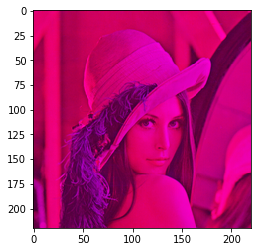

In [162]:
i = img.copy()
i[:, :, 1] = 0
imshow(i)

In [163]:
i

array([[[0.88235295, 0.        , 0.49803922],
        [0.8784314 , 0.        , 0.49803922],
        [0.8901961 , 0.        , 0.46666667],
        ...,
        [0.8901961 , 0.        , 0.5019608 ],
        [0.9098039 , 0.        , 0.4862745 ],
        [0.8352941 , 0.        , 0.40784314]],

       [[0.88235295, 0.        , 0.49803922],
        [0.8784314 , 0.        , 0.49803922],
        [0.8901961 , 0.        , 0.46666667],
        ...,
        [0.9019608 , 0.        , 0.50980395],
        [0.93333334, 0.        , 0.49803922],
        [0.85882354, 0.        , 0.4117647 ]],

       [[0.8901961 , 0.        , 0.47843137],
        [0.88235295, 0.        , 0.4627451 ],
        [0.89411765, 0.        , 0.45882353],
        ...,
        [0.81960785, 0.        , 0.41568628],
        [0.7411765 , 0.        , 0.3764706 ],
        [0.58431375, 0.        , 0.3137255 ]],

       ...,

       [[0.35686275, 0.        , 0.23529412],
        [0.37254903, 0.        , 0.23921569],
        [0.38039216, 0

Qual é a cor predominante dessa imagem? Mostre com números :)

In [129]:
img.sum(axis = 0).sum(axis = 0)

array([ 34207.30078125,  18800.82617188,  20007.4609375 ], dtype=float32)

Transforme essa imagem em uma imagem preto e branco! Como você acha que podemos fazer isso?

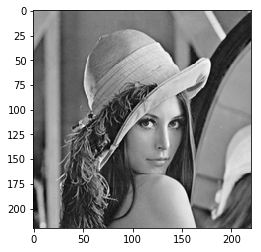

In [130]:
imshowg(img.mean(axis = 2))

## Case: Alturas dos pais e filhos
Vamos dar uma investigada em um dataset clássico de alturas. A principal pergunta que queremos responder é: existe alguma correlação entre a altura dos pais e de seus filhos?

In [164]:
heights = 2.54*utils.load_heights()

A primeira coluna contém as alturas dos pais e a segunda dos filhos. Porém as alturas estão em polegadas, mas queremos elas em centímetros. Além disso, para facilitar algumas análises, vamos criar um vetor 1D para os filhos e um para os pais:

In [167]:
p = heights[:, 0]
f = heights[:, 1]

Agora queremos responder algumas perguntas básicas primeiro:

* Quantos elementos/exemplos temos na nossa base?
* Qual o índice do filho mais baixo e do pai mais alto?
* Qual a probabilidade de um filho ser mais alto que seu pai?
* Estamos ficando mais altos ou mais baixos com o tempo?

In [168]:
print('instancias:', len(f))
print('filho mais baixo:', np.argmin(f))
print('pai mais alto:', np.argmax(p))
print('probabilidade:', (f > p).mean())

instancias: 1078
filho mais baixo: 422
pai mais alto: 157
probabilidade: 0.6289424860853432


Agora vamos plotar nossos pontos usando Matplotlib:

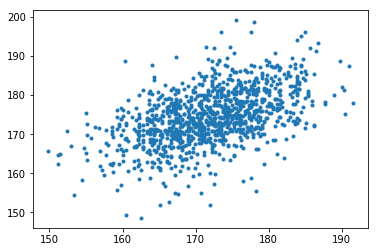

In [169]:
plt.plot(p, f, '.')

O que você acha da correlação? Se você tivesse que advinhar a altura do filho de uma pessoa com 160cm, qual seria seu melhor palpite?

Talvez 165cm?

Essa reta imaginária que visualizamos é um modelo que recebe a altura do pai e preve a altura do filho. Esse modelo pode ser visto como uma função `f(x) = y`, onde x é a altura do pai e y é a altura do filho.

Vocês conseguem definir essa função?

In [135]:
def predict(p):
    return 0.8*p + 35

Vamos revistar nossa resposta anterior usando nossa nova função:

In [136]:
predict(160)

163.0

Porém nós achamos essa reta no olhão. Se usarmos um número ligeiramente diferente, como podemos saber se a reta é melhor ou pior que outras que tentamos? Vamos definir nossa função de erro, que vai contabilizar todos nossos erros:

In [137]:
def error(y, yp):
    return np.abs(y-yp).mean()

5.31911985158


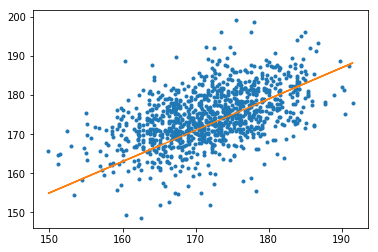

In [138]:
pf = predict(p)

print(np.abs(pf - f).mean())
plt.plot(p, f, '.')
plt.plot(p, pf)

In [139]:
error(f, pf)

5.3191198515769935

Agora vamos comparar nossos resultados com os do sklearn. Aposto que os nossos são melhores!

In [140]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(p.reshape(-1,1), f)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
lr.predict([[160]])

array([ 168.32865938])

In [142]:
print(lr.coef_[0], lr.intercept_)

0.514005912546 86.0877133733


**Pra casa:** Tente substituir esses valores na nossa função predict e plotar a reta. Ela parece fazer sentido?

## Case: Canceres benignos e malignos
Vamos trabalhar com um dataset famoso que contém medidas clínicas de diferentes tumores diagnosticados. Cada linha representa um tumor que eventualmente foi diagnosticado como benigno ou maligno. Vamos tentar responder algumas perguntas sobre esses dados.

* Quantos tumores temos no dataset? Quantas medidas pra cada tumor? E qual a porcentagem de benígnos?
* Queremos ter uma idéia dos dados que estamos trabalhando. Calcule a média, desvio padrão, mínimo, máximo de cada atributo/variável (aqui você pode usar um for para iterar nos atributos).
* Existem outliers nesse dataset? Conte o número de outliers de cada variável. Escolha uma variável com outliers (de preferência a que mais tem) e limite esses valores em um intervalo razoável para evitar que esses valores afetem nossa regressão.
* As variáveis assumem intervalos muito diferentes, portanto queremos normalizá-as. Faça com que cada variável esteja limitada entre 0 e 1 (basta subtrair cada elemento pelo menor valor e dividir pelo maior valor).
* Se você pudesse usar somente uma variável para identificar se um tumor é maligno ou benigno, como você encontraria a mais informativa? Qual valor de corte você usaria?

In [143]:
features, values, is_benign = utils.load_cancer()

Esses exercícios são um pouco mais difíceis, mas são bem próximos das tarefas do dia-a-dia de um cientista de dados. Case não entenda alguma solução, separe e inspecione as várias partes do comando e tente entender cada uma delas individualmente.

Quantos tumores temos no dataset? Quantas medidas/features/atributos temos pra cada tumor? E qual a porcentagem de benígnos?

In [144]:
print('# tumores:', len(values))
print('# medidas:', len(features))
print('% benignos:', is_benign.mean())

# tumores: 569
# medidas: 30
% benignos: 0.627416520211


Queremos ter uma idéia dos dados que estamos trabalhando. Calcule a média, desvio padrão, mínimo, máximo de cada atributo/variável (aqui você pode usar um for para iterar nos atributos).

In [145]:
for i in range(len(features)):
    feature_values = values[i]
    print(features[i], 
          feature_values.mean(), 
          feature_values.std(), 
          feature_values.min(), 
          feature_values.max())

mean radius 118.872615733 397.01313121 0.006193 2019.0
mean texture 124.6974489 415.051008087 0.003532 1956.0
mean perimeter 112.913085033 366.809508876 0.004571 1709.0
mean area 41.3333949333 120.847597162 0.00911 567.7
mean smoothness 111.222807167 357.933365406 0.005115 1575.0
mean compactness 50.1848434 155.08059187 0.005082 741.6
mean concavity 102.264578767 336.145184539 0.002179 1606.0
mean concave points 60.4812649 187.396689287 0.005412 897.0
mean symmetry 52.1632413333 158.796500755 0.003749 739.3
mean fractal dimension 49.7811466333 150.334171581 0.007149 711.4
radius error 77.0848317 245.666316926 0.003042 1150.0
texture error 82.1064985 266.405776082 0.004144 1299.0
perimeter error 98.9490263 305.402787792 0.003139 1332.0
area error 66.7292417 206.058817222 0.003002 876.5
smoothness error 52.9290484 159.174587812 0.006429 697.7
compactness error 65.3176521 202.001070323 0.005466 943.2
concavity error 72.5819394333 233.36343228 0.002085 1138.0
concave points error 83.679365

Existem outliers nesse dataset? Conte o número de outliers de cada variável. Escolha uma variável com outliers (de preferência a que mais tem) e limite esses valores em um intervalo razoável para evitar que esses valores afetem nossa regressão.

In [146]:
outliers_mask = (np.abs(values-values.mean(axis = 0)) > 3*values.std(axis = 0))
outliers_count = outliers_mask.sum(axis = 0)

for i in range(len(features)):
    print(features[i], outliers_count[i])

mean radius 5
mean texture 4
mean perimeter 7
mean area 8
mean smoothness 5
mean compactness 9
mean concavity 9
mean concave points 6
mean symmetry 5
mean fractal dimension 7
radius error 7
texture error 9
perimeter error 8
area error 6
smoothness error 7
compactness error 12
concavity error 6
concave points error 6
symmetry error 11
fractal dimension error 10
worst radius 6
worst texture 4
worst perimeter 6
worst area 10
worst smoothness 3
worst compactness 10
worst concavity 7
worst concave points 0
worst symmetry 9
worst fractal dimension 9


A maioria das features possui outliers. Vamos achar a que mais tem e substituir os outliers pelo valor que consideramos o máximo aceitável, a média mais três o desvio padrão.

In [147]:
max_outliers_feature = np.argmax(outliers_count)
print('Feature com mais outliers:', features[max_outliers_feature])

Feature com mais outliers: compactness error


In [148]:
feature_values = values[:,max_outliers_feature]
fmean = feature_values.mean()
fstd = feature_values.std()

no_outliers_values = values.copy()

positive_big_outliers = (feature_values - fmean) > 3*fstd
no_outliers_values[positive_big_outliers, max_outliers_feature] = fmean + 3*fstd

Por simplicidade, desconsideramos que podem ter outliers muito pequenos também, que poderiam ser tratados de forma semelhante, mas verificando se eles violam o limite inferior, não o superior.

As variáveis assumem intervalos muito diferentes, portanto queremos normalizá-as. Faça com que cada variável esteja limitada entre 0 e 1 (basta subtrair cada elemento pelo menor valor e dividir pelo diferença entre o maior valor e o menor).

In [149]:
minv = values.min(axis=0)
maxv = values.max(axis=0)
norm_values = (values - minv)/(maxv - minv)

Se você pudesse usar somente uma variável para identificar se um tumor é maligno ou benigno, como você encontraria a mais informativa? Qual valor de corte você usaria?

Modelos estatísticos são úteis exatamente para combinar todas features e chegar em uma resposta. Porém enquanto não aprendemos como usá-los, podemos tentar fazer análises univariadas (usam somente uma feature para tomar uma decisão).

Uma forma de encontrar as variáveis com maior correlação com a informação que queremos prever é calcular a média das features para os grupos que queremos prever separadamente. Ou seja, se a média da feature `worst_concave_points` é 98 para todos os tumores benignos e 210 para todos os malígnos, é possível que essa feature seja discriminatória em relação ao tipo de tumor. Ou seja, talvez podemos achar um valor C tal que uma regra "se `worst_concave_points` > C então o tumor é maligno" seja razoavelmente precisa.

In [156]:
benign_mask = is_benign == 1
malign_mask = ~benign_mask   # Operador de negação

benign_means = norm_values[benign_mask].mean(axis = 0)
malign_means = norm_values[malign_mask].mean(axis = 0)
mean_diffs = malign_means - benign_means
abs_mean_diffs = np.abs(mean_diffs)

Agora ordenamos as features com a maior diferença absoluta:

In [155]:
np.argsort(abs_mean_diffs)[::-1]

array([27,  7, 20, 22,  6,  2,  0, 26,  3, 23,  5, 25, 21, 24,  1, 10, 12,
       28, 17, 13,  8,  4, 15, 29, 16, 19, 14,  9, 11, 18], dtype=int64)

In [157]:
feature = 27

Como valor C podemos usar o valor bem no meio das médias de cada tipo de tumor:

In [158]:
cutoffs = (benign_means + malign_means)/2

Caso não seja óbvio para você, tente se convencer que `(a + b)/2` é sempre o valor perfeitamente entre a e b.

Só falta saber se são os valores maiores que V são os benignos ou os malignos:

In [159]:
print(benign_means[feature], malign_means[feature])

0.255822489821 0.626245056085


Ok, os benignos tem a média menor, então nossa regra é (feature_value < C) => benigno.

In [160]:
predicted_benign = (norm_values[:, feature] < cutoffs[feature])

Agora que temos uma vetor de predições usando nossa regra, podemos comparar com a verdade e ver como nos saímos:

In [161]:
(predicted_benign == benign_mask).mean()

0.90509666080843587

Isso quer dizer que criamos uma regra (que pode ser considerado um modelo simples) somente a partir dos dados (sem nenhum conhecimento de domínio), e sem utilizar nenhuma lib de machine learning, que consegue detectar se um tumor é maligno ou benigno com 90% de precisão.

Not bad, eu diria!

Em uma aplicação real teríamos reservado parte dos dados para validar nosso modelo, ignorando esses dados até a última parte onde aplicamos a regra e medimos a precisão. É como se esses dados fossem do futuro, onde já aprendemos a regra e estamos somente aplicando ela em novos pacientes. Isso evita algo que veremos mais para frente como overfitting.